In [58]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from webdriver_manager.firefox import GeckoDriverManager
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
from bs4 import BeautifulSoup
from selenium.webdriver.common.keys import Keys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
driver = webdriver.Firefox(executable_path=GeckoDriverManager().install())
driver.get('https://instagram.com/')

In [ ]:
#Insta Log In

user = driver.find_element_by_css_selector("input[name='username']")
user.send_keys("username")

password = driver.find_element_by_css_selector("input[name='password']")
password.send_keys("password")


login_button = driver.find_element_by_xpath("//button[@type='submit']")
login_button.click()

In [ ]:
#food search

search = driver.find_element_by_xpath("//input[@placeholder='Search']")
search.clear()
search.send_keys("food")
driver.implicitly_wait(5)


In [ ]:
foods =  driver.find_elements_by_xpath("//div[@class='_9_68 _9_6b _9_6i _9_6j _9_6t']")
print(foods)

In [ ]:
food_accounts=[]
for i in foods[:11]:
    name=i.get_attribute('innerHTML')
    if name[0]!='#':
        food_accounts.append(name)
for account in food_accounts:
    print(account)

In [ ]:
d={}
base_url='https:www.instagram.com/'

def count_followers(name):
    driver.get(base_url+name)

    data = driver.find_element_by_xpath("//li[@class='_9_da'][2]/a/div/span")
    
    count = int(data.get_attribute('title').replace(',',''))
    
    d[name]=count

for name in food_accounts:
    count_followers(name)
    

In [ ]:
top_names = dict(sorted(d.items(), key=lambda item: item[1],reverse=True)[:5])

In [ ]:
for ele in top_names:
    print(ele,':',top_names[ele])

In [ ]:
top_posts={}
base_url='https:www.instagram.com/'

def count_posts(name):
    
    count=0
    driver.get(base_url+name)
    driver.implicitly_wait(15)
    data = driver.find_element_by_xpath("//li[@class='_9_da'][2]/a/div/span")

    post = WebDriverWait(driver,15).until(EC.presence_of_element_located((By.XPATH,"//div[@class='_9-4k _9zo3 _9_md']")))
    post.click()
    driver.implicitly_wait(15) 
    
    while True:
        

        time_tag=driver.find_element_by_xpath("//time[@class='_9_wy _a41t']")

        time =time_tag.get_attribute('innerHTML')
        if time[-1] in ['h','s','m']:
            count+=1
        elif time[-1]=='d':
            d=int(time[:-1])
            if d<=3:
                count+=1
        else:
            driver.back()
            break
            
        next_button=driver.find_element_by_xpath("//div[@class = ' _a1bt _a2jd']/button")
        next_button.click()
        driver.implicitly_wait(15) 
        
    top_posts[name]=count
    

for name in top_names:
    count_posts(name)



In [ ]:
print(top_posts)

In [121]:
#2.1
#collect posts and hashtags

user_posts={}
user_hashtags={}
user_likes={}
base_url='https:www.instagram.com/'

def store_posts(name):
    
    driver.get(base_url+name)
    driver.implicitly_wait(15)
    data = driver.find_element_by_xpath("//li[@class='_9_da'][2]/a/div/span")

    post = WebDriverWait(driver,15).until(EC.presence_of_element_located((By.XPATH,"//div[@class='_9-4k _9zo3 _9_md']")))
    post.click()
    driver.implicitly_wait(15) 
    
    count=0
    hashtags=[]
    posts=[]
    total_likes=0
    while True:
        post_tag=driver.find_element_by_xpath("//div[@class='_a6o-']/span")
        post=post_tag.get_attribute('textContent')
        posts.append(post)
        
        hashtags_tag=driver.find_elements_by_xpath("//div[@class='_a6o-']/span/a")
        for hash_data in hashtags_tag:
            hashtags.append(hash_data.get_attribute('innerHTML'))           
        
        
        try:
            like_tag = driver.find_element_by_xpath("//section[@class='_9-v2 _a040']/div/div/div/a/div")
        
            likes = BeautifulSoup(like_tag.get_attribute('outerHTML'),'html.parser').text
            like_tag = driver.find_element_by_xpath("//section[@class='_9-v2 _a040']/div/div/div/a/div")
        
            likes = BeautifulSoup(like_tag.get_attribute('outerHTML'),'html.parser').text
            no_likes=int(likes.split()[0].replace(",",""))
            total_likes+=int(no_likes)

        except:
            like_button=driver.find_element_by_xpath("//div[@class = '_9zzw']/span")
            driver.execute_script("arguments[0].click();", like_button)
    
            like_tag=driver.find_element_by_xpath("//div[@class = '_9zzv']/span")
            like_data=like_tag.get_attribute('innerHTML')
            no_likes=int(like_data.replace(",",""))
        
            total_likes+=int(no_likes)
            driver.find_element_by_xpath("//div[@class = '_9zzs']").click()

        count+=1
        if count>9:
            break
        next_button=driver.find_element_by_xpath("//div[@class = ' _a1bt _a2jd']/button")
        next_button.click()
        driver.implicitly_wait(15) 
    user_posts[name]=posts
    user_hashtags[name]=hashtags
    user_likes[name]=total_likes
    driver.back()
    
for name in top_names:
    store_posts(name)

In [120]:
user_likes

{'foodgod': 190713,
 'yourfoodlab': 47128,
 'foodfusionpk': 8544,
 'foodie_incarnate': 206710,
 'foodhunter_sabu': 231969}

In [ ]:
print(user_posts)
print(user_hashtags)

In [45]:
word_freq={}
for user in user_hashtags:
    words=user_hashtags[user]
    for word in words:
        if word[0]!='@':
            word_freq[word]=word_freq.get(word,0)+1

In [49]:
df=pd.DataFrame()
words = [i for i in word_freq.keys()]
frequencies = [i for i in word_freq.values()]
df['Words']=words
df['Frequencies']=frequencies

df.to_csv('Word_Frequencies')

In [53]:
new=np.array(words)

In [54]:
new

array(['#kardashians', '#nationaltaterday', '#Foodgod', '#FoodgodReacts',
       '#FoodReviews', '#CrazyFood', '#Food', '#foodhack', '#spicymayo',
       '#sushi', '#food', '#babycornchilli', '#yourfoodlab',
       '#sanjyotkeer', '#foodporn', '#recipe', '#weeklyrewind', '#mutton',
       '#pasta', '#recipeoftheday', '#indiancuisine', '#foodie',
       '#jaljeera', '#yflapron', '#MuttonRecipes', '#YFL', '#SanjyotKeer',
       '#YFLrecipes', '#Instafoodie', '#jaljeerasoda', '#beattheheat',
       '#refreshing', '#recipes', '#indianfood', '#pastarecipe', '#promo',
       '#italianfood', '#oregano', '#oreganoseasoning', '#streetfood',
       '#video', '#reelitfeelit', '#reelsinstagram', '#insta',
       '#instagram', '#veglollipop', '#rewind', '#foodpics',
       '#sabudanavada', '#oodles', '#delicious', '#instafood',
       '#pavbhaji', '#jainrecipe', '#sandwich', '#sandwichesofinstagram',
       '#reel', '#reelfood', '#foodreels', '#sandwichrecipe',
       '#sandwichporn', '#chesse', '#

In [55]:
word_freq = dict(sorted(word_freq.items(), key=lambda item: item[1],reverse=True)[:5])

In [66]:
print(word_freq)
words=[i for i in word_freq.keys()]
freq=[i for i in word_freq.values()]


{'#foodporn': 13, '#foodie': 13, '#streetfood': 10, '#recipevideo': 10, '#foodieincarnate': 9}


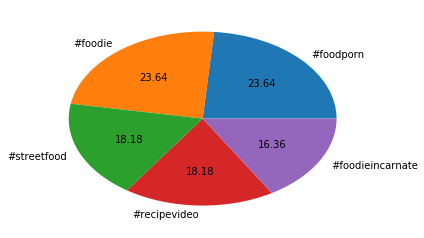

In [72]:
plt.pie(freq,labels=words,autopct="%.2f")
# plt.figure(figsize=(20,20))
plt.show()

In [122]:
user_likes

{'foodgod': 469023,
 'yourfoodlab': 200273,
 'foodfusionpk': 29322,
 'foodie_incarnate': 341150,
 'foodhunter_sabu': 421214}

In [124]:
top_names

{'foodgod': 3793035,
 'yourfoodlab': 1959461,
 'foodfusionpk': 1725340,
 'foodie_incarnate': 1295942,
 'foodhunter_sabu': 445045}

In [125]:
avg_likes=[]

for name in top_names:
    avg=user_likes[name]/10
    avg_likes.append(avg)

In [126]:
avg_likes

[46902.3, 20027.3, 2932.2, 34115.0, 42121.4]

In [131]:
avg_followers=[]

i=0
for name in top_names:
    avg=top_names[name]/avg_likes[i]
    avg_followers.append(avg)
    i+=1
print(avg_followers)

[80.87098074081655, 97.83949908375068, 588.4114316895165, 37.98745419903268, 10.565769418870218]


In [134]:
user_list=[i for i in top_names]

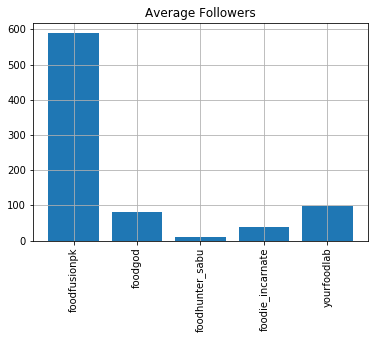

In [141]:
plt.bar(user_list,avg_followers)
plt.title('Average Followers')
plt.xticks(rotation=90)
plt.grid()
plt.show()



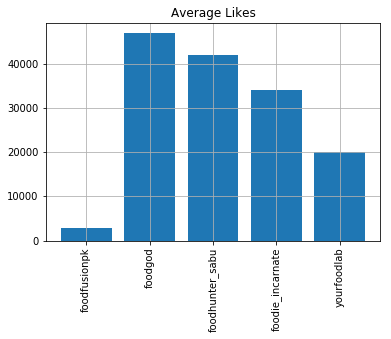

In [140]:
plt.bar(user_list,avg_likes)
plt.title('Average Likes')
plt.xticks(rotation=90)
plt.grid()
plt.show()
